In [1]:
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt


In [2]:
train = pd.read_csv('data/challenge3_train.csv')
test = pd.read_csv('data/challenge3_test.csv')
data = pd.concat([train, test])
print(f'train: {train.shape} | test: {test.shape}, all: {data.shape}')
train.head(2)

train: (50000, 33) | test: (50000, 32), all: (100000, 33)


,id,target,f0,f1,f2,f3,f4,f5,f6,f7,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
0,0,1,0.0,5.0,0.0,4.0,3598.0,M,3.0,-7.2430,...,3.0,14.2364,0.0,NaN,4.0,1.0,5.0,PS,2.0,0.834041
1,1,0,NaN,5.0,4.0,NaN,2072.0,NaN,4.0,-1.6662,...,3.0,NaN,2.0,3.0,NaN,1.0,5.0,DT,5.0,0.686021


In [3]:
data = data.drop(['id', 'target'], axis=1)

In [7]:
# Generate reports
#pandas_profiling.ProfileReport(train, minimal=False).to_file('train_report.html')
#pandas_profiling.ProfileReport(test, minimal=False).to_file('test_report_small.html')

# Report for 1/0 class
#pandas_profiling.ProfileReport(train[train['target'] == 1], minimal=False).to_file('train_1_report.html')
#pandas_profiling.ProfileReport(train[train['target'] == 0], minimal=False).to_file('train_0_report.html')


Comparing train and test data: 
From reports we see f13 has different data distribution; more outliers around 28 and 60.


High corelevance with f10 and f14

Categorical:
f5: M, F
f15: A, B, C
f20: A-Z

## Compare 1/0 target class
#### 1 target:
- correlations (which are not present in other target): 
    - f21-f6 (very high). f21: 1-5, uniform distributiuon (target 0 is more normal-like). f6: 0-5, bit skewed to the right uniform dist. 
    - f25-f6 f25: uniform-ish except 0. 
    - f26-f4. f26: boolean, many 1. f4: real, lower mean, std
#### 0 target:
- correlations:
    - f26-f0. f26: bool, more are false than target 1. f0: bool
    - f26-f6. f6: 0-5, 4 most common, higher mean than t1. 


Percentage of feature values being NaN


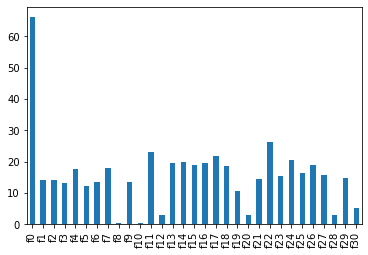

In [20]:
print('Percentage of feature values being NaN')
nans = data.isna().sum().map(lambda x: x / len(data) * 100).round(1).plot(kind='bar')

In [24]:
for column in data.columns:
    unique = data[column].unique()
    count = len(unique)
    print('Column', column)
    print('Values:', unique)
    print('Number of unique:', count)
    print('\n')
    

Column f0
Values: [ 0. nan  1.]
Number of unique: 3


Column f1
Values: [ 5.  1. nan  2.  3.  4.  0.]
Number of unique: 7


Column f2
Values: [ 0.  4.  2. nan  3.  5.  1.]
Number of unique: 7


Column f3
Values: [ 4. nan  2.  1.  3.  5.  0.]
Number of unique: 7


Column f4
Values: [3598. 2072.  862. ... 1261. 1257.  518.]
Number of unique: 3768


Column f5
Values: ['M' nan 'F']
Number of unique: 3


Column f6
Values: [ 3.  4.  5. nan  1.  0.  2.]
Number of unique: 7


Column f7
Values: [ -7.243   -1.6662  -0.12   ...  -6.8409  -5.4951 -10.1088]
Number of unique: 67092


Column f8
Values: [13.9681 14.0242 14.2174 ... 13.803  14.6088 13.8286]
Number of unique: 8176


Column f9
Values: [ 3.  0.  1.  5. nan  2.  4.]
Number of unique: 7


Column f10
Values: [0.000e+00 3.200e+01 5.000e+00 8.400e+01 1.200e+01 1.700e+01 1.900e+01
 5.240e+02 1.100e+01 2.200e+01 3.800e+01 4.500e+01 3.000e+00 2.000e+00
 6.000e+00 4.000e+00 2.900e+01 9.100e+01 5.000e+01 7.000e+00 7.200e+01
 5.100e+01 1.600e+01 3.5

Distribution of unique values and Nan:
Column f0


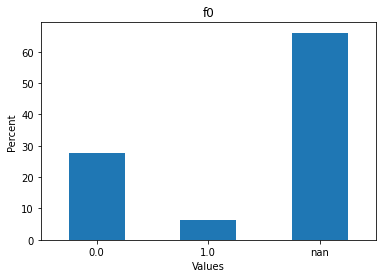

Column f1


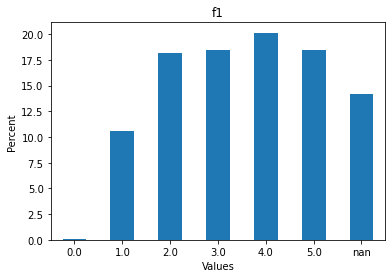

Column f2


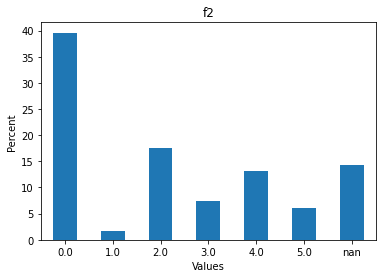

Column f3


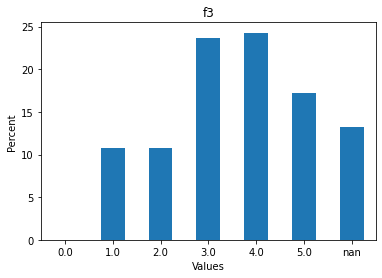

Column f5


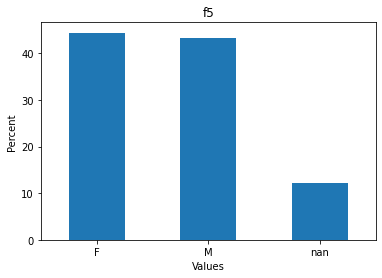

Column f6


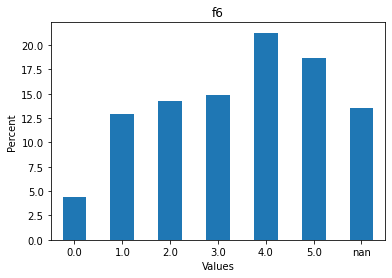

Column f9


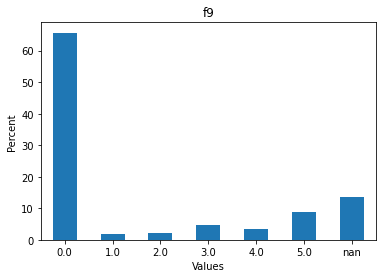

Column f11


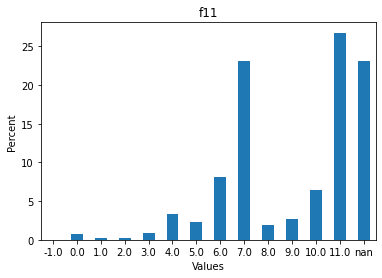

Column f15


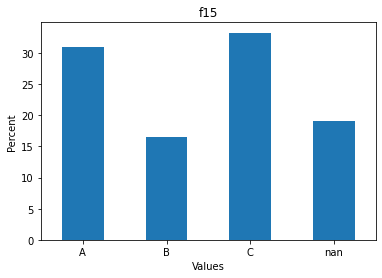

Column f17


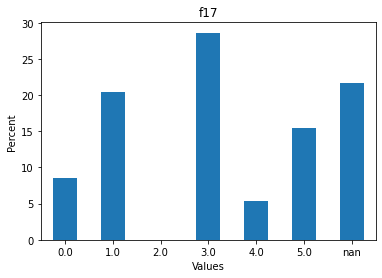

Column f18


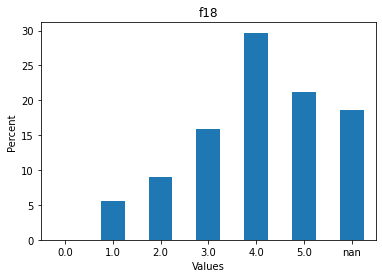

Column f19


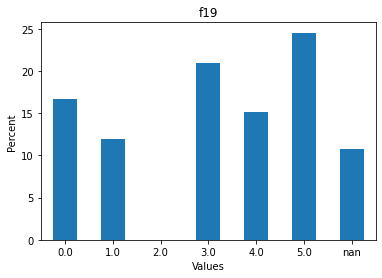

Column f20


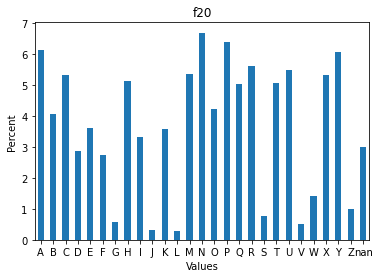

Column f21


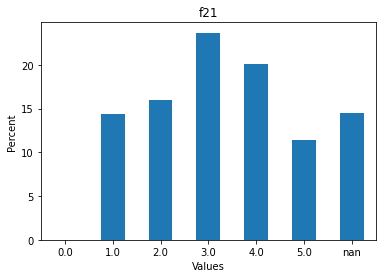

Column f23


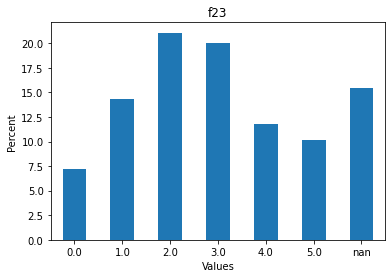

Column f24


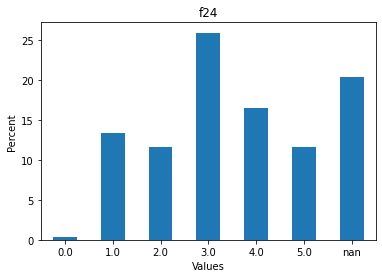

Column f25


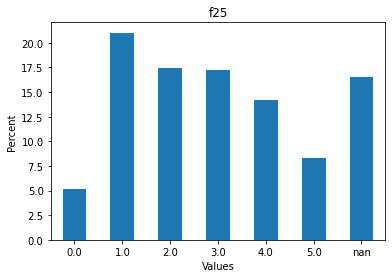

Column f26


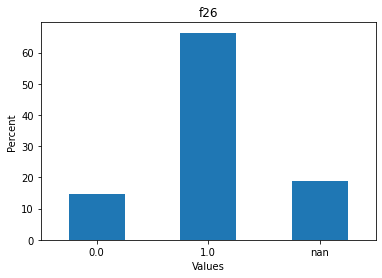

Column f27


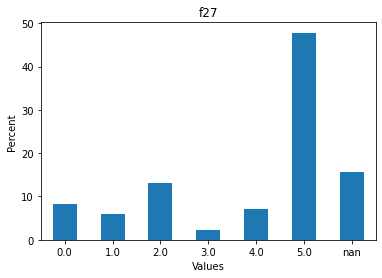

Column f29


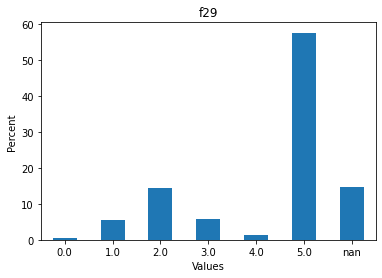

In [26]:
print('Distribution of unique values and Nan:')      
for column in data.columns:
    count = len(data[column].unique())
    if count > 30:
        continue # Too many values to compute/display graph on
    value_percent = data[column].value_counts(dropna=False, sort=False).map(lambda x: x / len(data[column]) * 100).sort_index()
    print('Column', column)
    
    ax = value_percent.plot.bar(rot=0)
    ax.set_title(column)
    plt.ylabel('Percent')
    plt.xlabel('Values')
    plt.show()


## From the graphs we see the following
Graphs with zero (0) as noise, meaning we can probably drop them:
f1, f3, f18, f21, f24, f29

f11 have noise in -1, in addition to 0.

f17, f19 have only 0.002% and 0.001% 2 value counts

In [ ]:
zero_columns = ['f1', 'f3', 'f11', 'f18', 'f21', 'f24', 'f29']

In [ ]:
print('Look into zero values in train and test set')
for column in zero_columns:
    print('\n', column)
    print('Zero value in feature grouped by target:')
    print(train.loc[train[column] == 0].groupby([column, 'target']).size())
    print('\n')
    print('Zero value count in train vs test set')
    print('train:', train.loc[train[column] == 0].shape[0])
    print('test :', test.loc[test[column] == 0].shape[0])
    
    if (column == 'f11'):
        print('\n')
        print(train.loc[train[column] == -1].groupby([column, 'target']).size())
        print('train:', train.loc[train['f11'] == -1].shape[0])
        print('test :', test.loc[test['f11'] == -1].shape[0])

print('We see 0 value can be removed/changed safely from f3, f18, f21')

# Now explore train data (with known target)

Tageet distribution:


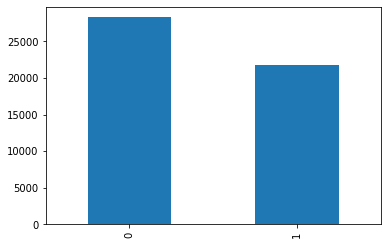

We see targets are not balanced


In [27]:
print('Tageet distribution:')
train['target'].value_counts().plot.bar()
plt.show()
print('We see targets are not balanced')

Show how the catergorical values are distributed per target


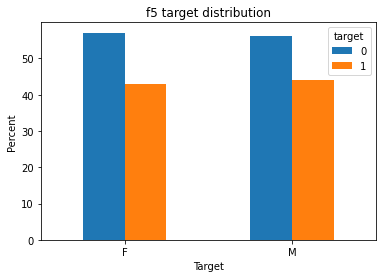

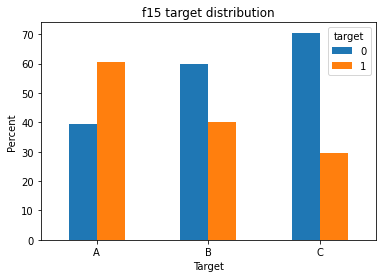

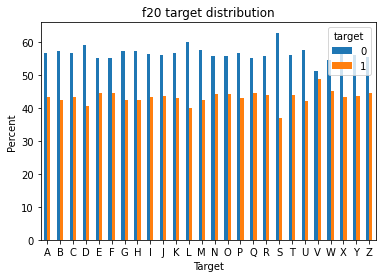

In [59]:
cat_columns = ['f5', 'f15', 'f20']

print('Show how the catergorical values are distributed per target')
for column in cat_columns:
    group = train.groupby([column, 'target'])
    percent = group.size().groupby(level=0).apply(lambda count: 100 * count / sum(count)).rename('Percent').reset_index()
    pivot = percent.pivot(column, 'target', 'Percent')

    ax = pivot.plot.bar(stacked=False, rot=0)
    plt.title(f'{column} target distribution')
    plt.ylabel('Percent')
    plt.xlabel('Target')
    plt.show()

In [68]:
# Out of curiosity we want to explore the rows with a 1 and a 0 separately
true_train = train.loc[train['target'] == 1]
false_train = train.loc[train['target'] == 0]


In [ ]:
true_profile = pandas_profiling.ProfileReport(true_train_data, minimal=True).to_file('true_train_report.html')
true_profile = pandas_profiling.ProfileReport(false_train_data, minimal=True).to_file('false_train_report.html')

By looking at the different in distribution of values within each column with respect to whether the target is a 0 or a 1
the interesting columns seem to be:
f0, f1, f2, f3, f4, f6, f13, f14(?) f15, f17, f18, f19, f21, f23, f24, f25, f26

f13: different distribution, and 0 class have a weird common interval. Feature could be age, since values are whole numbers. 
then negative values are noise, and should be removed. 

f15: (A, B, C column) is _very_ discriminating between 0 and 1. A is twice as often a 1 than C, and the opposite for 0. 
 B have equal distribution.
 
f18: Many '5' values are class 1. 